## The Android App Market on Google Play
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. <p> 
<p>This project will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p>

In [1]:
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', len(apps), '\n')

print(apps.info())
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
Unnamed: 0        9659 non-null int64
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null object
Installs          9659 non-null object
Type              9658 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5092,6088,Wolf of the BF:Commando MOBILE,GAME,3.4,32,27M,"1,000+",Paid,$0.99,Everyone 10+,Arcade,"March 23, 2017",1.00.10,4.0 and up
159,159,Cloud of Books,BOOKS_AND_REFERENCE,3.3,1862,19M,"1,000,000+",Free,0,Everyone,Books & Reference,"April 27, 2018",2.2.5,4.1 and up
6461,7511,Car Search For Craigslist CL Free,AUTO_AND_VEHICLES,2.6,5,9.0M,"1,000+",Free,0,Everyone,Auto & Vehicles,"May 8, 2018",1.0.0,2.3.3 and up
6393,7440,C J Academy,FAMILY,NaN,0,5.2M,10+,Free,0,Everyone,Education,"April 2, 2018",1.0,4.4 and up
2354,3005,MLB Ballpark,SPORTS,3.9,5510,32M,"1,000,000+",Free,0,Everyone,Sports,"July 16, 2018",7.3.0,4.2 and up


#### Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later.</p>

In [2]:
apps[apps['Size'].str.contains('k', na=False)].Size

Series([], Name: Size, dtype: object)

In [3]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    apps[col] = pd.to_numeric(apps[col]) 

#### Exploring app categories
<p>With more than 1 billion active users around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>

In [4]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories, '\n')

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
print('5 apps that have the highest market prevalence :\n', num_apps_in_category[:5])
data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33 

5 apps that have the highest market prevalence :
 FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64


#### Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>

In [5]:
avg_app_rating = round(apps['Rating'].mean(), 2)
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.17


The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

#### Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience the mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of the target market; especially due to internet speeds, earning power and exchange rates.</p>

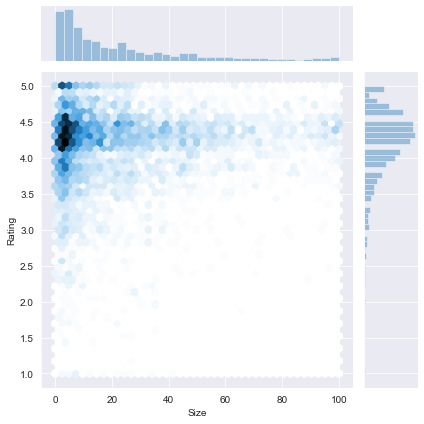

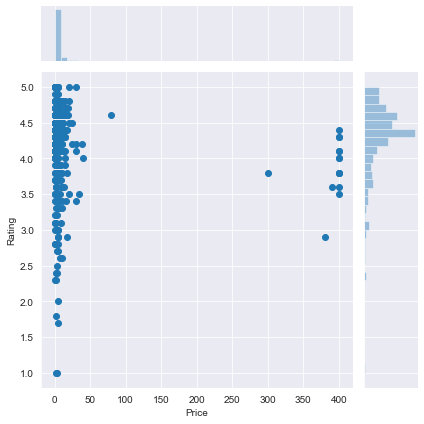

In [6]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

paid_apps = apps[apps['Type'] == 'Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

We find that the majority of top-rated apps (rating over 4) is under 20 MB. We also find that the vast majority of apps price themselves under \$10.

#### Relation between app category and app price
<p>So now comes the hard part. The costs of apps are largely based on features, complexity, and platform. There are many factors to consider when selecting the right pricing strategy for mobile app. It is important to consider the willingness of the customer to pay for the app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. We will see the relation between app category and app price.</p>

Populer Apps whose price is greater than $200 :
        Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763   

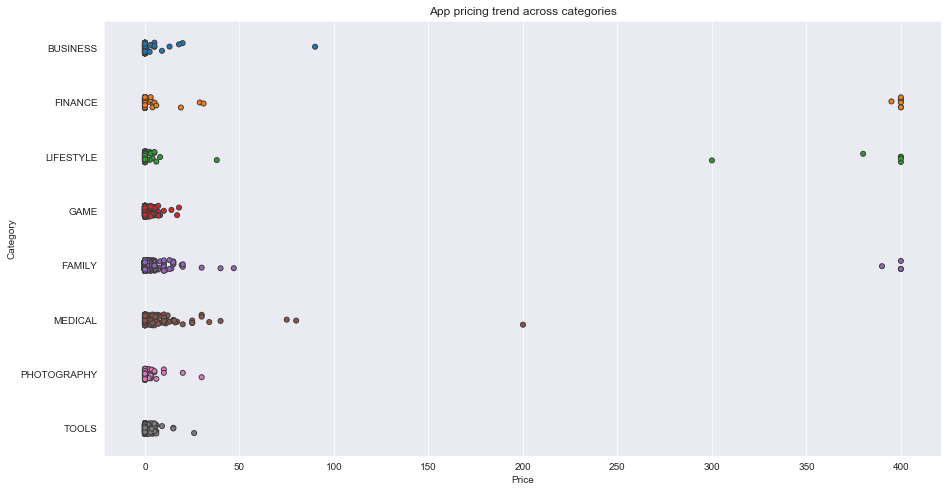

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
print('Populer Apps whose price is greater than $200 :\n', apps_above_200)

#### Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.</p>

AxesSubplot(0.125,0.125;0.775x0.755)


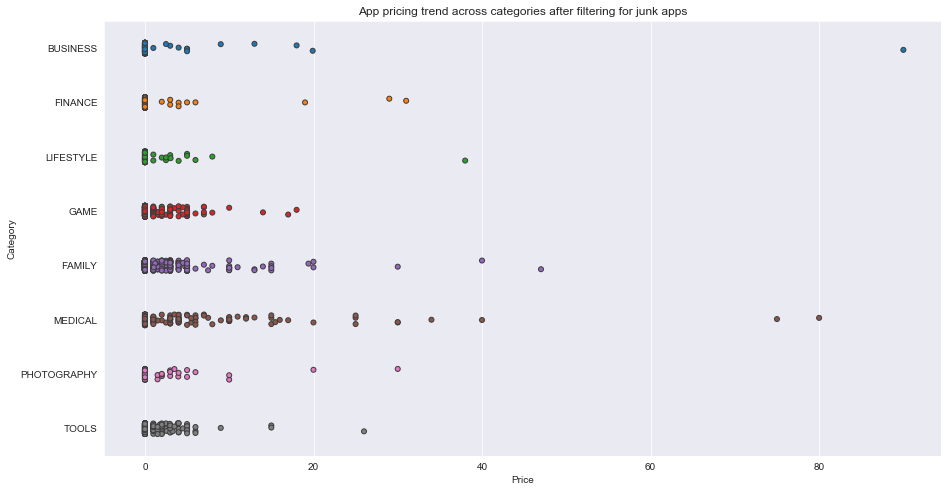

In [8]:
apps_under_100 = popular_app_cats[popular_app_cats.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
print(ax)

<p>We see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20. <p>

#### Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>We will see the difference in the number of installs between paid apps and free apps.</p>

In [9]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps.Type == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps.Type == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

#### Sentiment analysis of user reviews
<p>It turns out that paid apps have a relatively lower number of installs than free apps. </p>
<p>Mining user review data to determine how people feel about the product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>We will plot sentiment polarity scores of user reviews for paid and free apps.</p>

AxesSubplot(0.125,0.125;0.775x0.755)


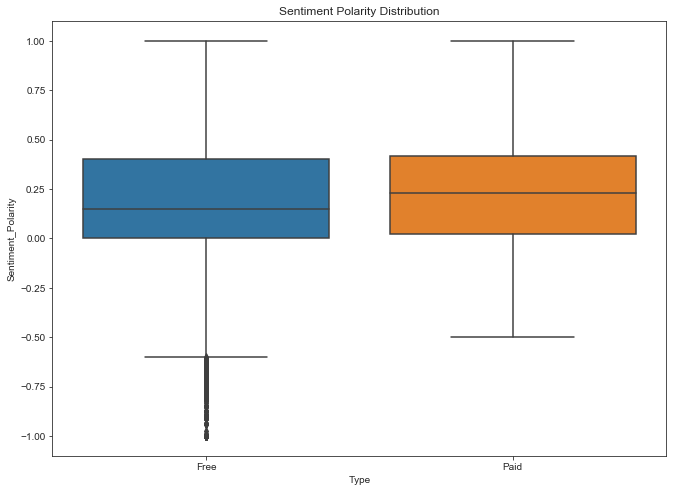

In [10]:
reviews_df = pd.read_csv('datasets/user_reviews.csv')

merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
print(ax)

<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps.</p>

### The conclucion
<p>1. From 33 unique app categories, 5 apps that have the highest market prevalence are Family, Game, Tools, Business, and Medical.
<p>2. The majority of top-rated apps (rating over 4) is under 20 MB and the vast majority of apps price themselves under \$10. 
<p>3. After filter out the junk apps, Medical and Family apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below $20.
<p>4. Paid apps have a relatively lower number of installs than free apps.
<p>5. Free apps receive a lot of harsh comments. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps.